In [116]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False


In [117]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:

len(bream_length)
# b_weight

35

length > 합치기,
weight > 합치기,
####### train_input, test_input, train_target, test_target 만들기

In [118]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
result = [1 for i in range(35)]+[0 for j in range(14)]
datas = []
for i in range(len(length)):
    datas.append([length[i],weight[i],result[i]])

len(datas)
# datas[0:5]

49

### zip()

In [12]:
# datas = [[l,w,r] for l,w,r in zip(length,weight,result)]
# datas

In [34]:
datas

[[25.4, 242.0, 1],
 [26.3, 290.0, 1],
 [26.5, 340.0, 1],
 [29.0, 363.0, 1],
 [29.0, 430.0, 1],
 [29.7, 450.0, 1],
 [29.7, 500.0, 1],
 [30.0, 390.0, 1],
 [30.0, 450.0, 1],
 [30.7, 500.0, 1],
 [31.0, 475.0, 1],
 [31.0, 500.0, 1],
 [31.5, 500.0, 1],
 [32.0, 340.0, 1],
 [32.0, 600.0, 1],
 [32.0, 600.0, 1],
 [33.0, 700.0, 1],
 [33.0, 700.0, 1],
 [33.5, 610.0, 1],
 [33.5, 650.0, 1],
 [34.0, 575.0, 1],
 [34.0, 685.0, 1],
 [34.5, 620.0, 1],
 [35.0, 680.0, 1],
 [35.0, 700.0, 1],
 [35.0, 725.0, 1],
 [35.0, 720.0, 1],
 [36.0, 714.0, 1],
 [36.0, 850.0, 1],
 [37.0, 1000.0, 1],
 [38.5, 920.0, 1],
 [38.5, 955.0, 1],
 [39.5, 925.0, 1],
 [41.0, 975.0, 1],
 [41.0, 950.0, 1],
 [9.8, 6.7, 0],
 [10.5, 7.5, 0],
 [10.6, 7.0, 0],
 [11.0, 9.7, 0],
 [11.2, 9.8, 0],
 [11.3, 8.7, 0],
 [11.8, 10.0, 0],
 [11.8, 9.9, 0],
 [12.0, 9.8, 0],
 [12.2, 12.2, 0],
 [12.4, 13.4, 0],
 [13.0, 12.2, 0],
 [14.3, 19.7, 0],
 [15.0, 19.9, 0]]

In [119]:
df = pd.DataFrame(datas)
df

,0,1,2
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


In [120]:
ran = [n for n in range(49)]
random.shuffle(ran)

datas = df.iloc[ran,:]
datas

,0,1,2
33,41.0,975.0,1
19,33.5,650.0,1
18,33.5,610.0,1
13,32.0,340.0,1
9,30.7,500.0,1
35,9.8,6.7,0
47,14.3,19.7,0
6,29.7,500.0,1
36,10.5,7.5,0
29,37.0,1000.0,1


### numpy를 이용한 랜덤

In [68]:
# np.random.seed(49)
# index = np.arange(49)      # 150개의 랜덤배열 생성
# np.random.shuffle(index)
# index

array([14, 27, 24, 16, 17, 41,  0, 19, 31,  2, 21, 10, 30, 22, 38, 23, 11,
       34, 20,  1, 13,  7, 43, 25, 46,  4,  9, 29,  3,  8, 39, 28, 15, 37,
       33,  6, 26, 35, 48, 32, 47, 36, 18, 44,  5, 12, 40, 45, 42])

In [122]:
train_input = datas.iloc[:35,:2]
train_target = datas.iloc[:35,2:]
test_input = datas.iloc[35:,:2]
test_target = datas.iloc[35:,2:]


In [123]:
clf = svm.SVC()
clf.fit(train_input,train_target)
clf.predict(test_input)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [124]:
clf.score(test_input,test_target)

1.0

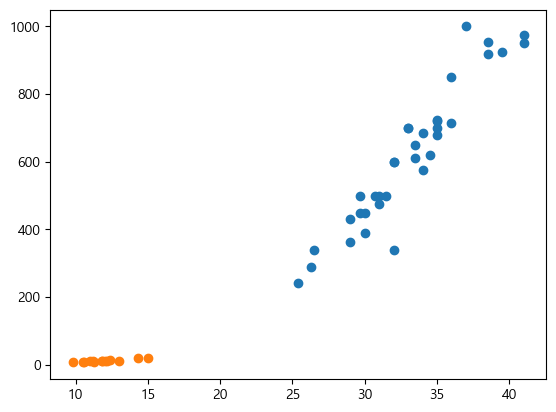

In [125]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

In [126]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
result = [1 for i in range(35)]+[0 for j in range(14)]
datas2 = []
for i in range(len(length)):
    datas2.append([length[i],weight[i],result[i]])
datas2

[[25.4, 242.0, 1],
 [26.3, 290.0, 1],
 [26.5, 340.0, 1],
 [29.0, 363.0, 1],
 [29.0, 430.0, 1],
 [29.7, 450.0, 1],
 [29.7, 500.0, 1],
 [30.0, 390.0, 1],
 [30.0, 450.0, 1],
 [30.7, 500.0, 1],
 [31.0, 475.0, 1],
 [31.0, 500.0, 1],
 [31.5, 500.0, 1],
 [32.0, 340.0, 1],
 [32.0, 600.0, 1],
 [32.0, 600.0, 1],
 [33.0, 700.0, 1],
 [33.0, 700.0, 1],
 [33.5, 610.0, 1],
 [33.5, 650.0, 1],
 [34.0, 575.0, 1],
 [34.0, 685.0, 1],
 [34.5, 620.0, 1],
 [35.0, 680.0, 1],
 [35.0, 700.0, 1],
 [35.0, 725.0, 1],
 [35.0, 720.0, 1],
 [36.0, 714.0, 1],
 [36.0, 850.0, 1],
 [37.0, 1000.0, 1],
 [38.5, 920.0, 1],
 [38.5, 955.0, 1],
 [39.5, 925.0, 1],
 [41.0, 975.0, 1],
 [41.0, 950.0, 1],
 [9.8, 6.7, 0],
 [10.5, 7.5, 0],
 [10.6, 7.0, 0],
 [11.0, 9.7, 0],
 [11.2, 9.8, 0],
 [11.3, 8.7, 0],
 [11.8, 10.0, 0],
 [11.8, 9.9, 0],
 [12.0, 9.8, 0],
 [12.2, 12.2, 0],
 [12.4, 13.4, 0],
 [13.0, 12.2, 0],
 [14.3, 19.7, 0],
 [15.0, 19.9, 0]]

In [127]:
ran2 = [n for n in range(49)]
random.shuffle(ran2)
ran2[0]

48

In [128]:
random.shuffle(datas2)

In [129]:
# for 문을 사용해서 35, 14개를 분리해서 출력하시오.


datas2
train_input2 = []
train_target2 = []
test_input2 = []
test_target2 = []

for i in range(35):
    train_input2.append(datas2[i][0:2])
    train_target2.append(datas2[i][2])
    
for i in range(35,49):
    test_input2.append(datas2[i][0:2])
    test_target2.append(datas2[i][2])


train_input2
test_target2


clf = svm.SVC()
clf.fit(train_input2,train_target2)
clf.predict(test_input2)
clf.score(test_input2,test_target2)


1.0

In [64]:
# idx = [i for i in range(49)]
# random.shuffle(idx)

# a = [datas2[i] for i in idx[:35]]
# a

[[10.6, 7.0, 0],
 [13.0, 12.2, 0],
 [41.0, 950.0, 1],
 [33.0, 700.0, 1],
 [36.0, 714.0, 1],
 [11.2, 9.8, 0],
 [12.0, 9.8, 0],
 [35.0, 700.0, 1],
 [30.7, 500.0, 1],
 [34.0, 685.0, 1],
 [37.0, 1000.0, 1],
 [14.3, 19.7, 0],
 [36.0, 850.0, 1],
 [29.0, 430.0, 1],
 [33.5, 650.0, 1],
 [12.2, 12.2, 0],
 [30.0, 450.0, 1],
 [31.0, 500.0, 1],
 [33.0, 700.0, 1],
 [38.5, 955.0, 1],
 [15.0, 19.9, 0],
 [38.5, 920.0, 1],
 [32.0, 600.0, 1],
 [29.7, 500.0, 1],
 [9.8, 6.7, 0],
 [34.0, 575.0, 1],
 [31.0, 475.0, 1],
 [11.8, 9.9, 0],
 [41.0, 975.0, 1],
 [25.4, 242.0, 1],
 [10.5, 7.5, 0],
 [35.0, 720.0, 1],
 [11.0, 9.7, 0],
 [34.5, 620.0, 1],
 [12.4, 13.4, 0]]

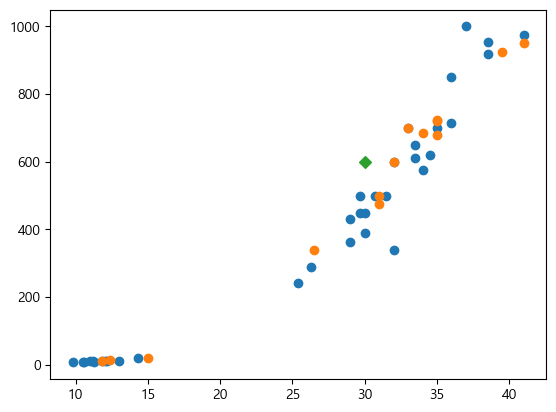

In [130]:
plt.scatter(train_input[0],train_input[1])
plt.scatter(test_input[0],test_input[1])
plt.scatter(30,600,marker='D')
# train_input[0]

In [78]:
# plt.scatter(train_input2[0],train_input2[1])
# plt.scatter(test_input2[0],test_input2[1])
train_input2

[[36.0, 714.0],
 [34.0, 575.0],
 [38.5, 920.0],
 [30.0, 390.0],
 [11.8, 10.0],
 [41.0, 950.0],
 [33.0, 700.0],
 [29.0, 430.0],
 [37.0, 1000.0],
 [10.6, 7.0],
 [15.0, 19.9],
 [33.5, 650.0],
 [13.0, 12.2],
 [11.2, 9.8],
 [12.0, 9.8],
 [35.0, 680.0],
 [30.7, 500.0],
 [31.5, 500.0],
 [29.7, 450.0],
 [30.0, 450.0],
 [12.4, 13.4],
 [33.0, 700.0],
 [32.0, 340.0],
 [33.5, 610.0],
 [12.2, 12.2],
 [38.5, 955.0],
 [34.5, 620.0],
 [11.3, 8.7],
 [31.0, 475.0],
 [32.0, 600.0],
 [11.8, 9.9],
 [29.7, 500.0],
 [25.4, 242.0],
 [26.3, 290.0],
 [32.0, 600.0]]

# KNN(k근접)데이터 학습

In [131]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
# clf = svm.SVC()
clf.fit(train_input2,train_target2)

clf.predict(test_input2)
clf.score(test_input2,test_target2)

1.0

In [132]:

if clf.predict([[30,600]]) == 1:
    print('도미입니다.')
else :
    print('빙어입니다.')


도미입니다.


In [133]:
# 길이 25, 무게 150 
def cl(x,y):
    return [[x,y]]

if clf.predict(cl(25,150)) == 1:
    print('도미입니다.')
else :
    print('빙어입니다.')

빙어입니다.


In [138]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌.
distances,indexs = clf.kneighbors([[25,150]])


TypeError: only integer scalar arrays can be converted to a scalar index

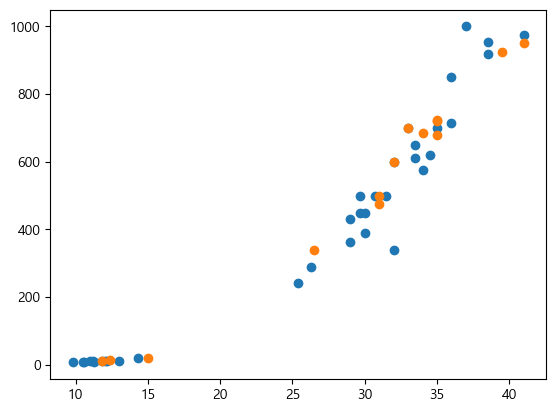

In [141]:
plt.scatter(train_input[0],train_input[1])
plt.scatter(test_input[0],test_input[1])
plt.scatter(train_input[0][indexs],train_input[1][indexs])
plt.scatter(25,150,marker='D')
# plt.xlim(0,1)
# plt.ylim(0,1)